# Machine Learning Implementation (Support Vector Machines)

This document contains the actual data splitting, training, and metrics for the following machine learning models

## Importing our libraries

In [17]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
import joblib 

from time import time
from scipy.stats import randint
import pickle

## Reading saved clean data

In [18]:
base_df = pd.read_pickle('cleaned_data_loan_approval.pkl')
base_no_outliers_df = pd.read_pickle('cleaned_data_loan_approval_without_outliers.pkl')

display(base_df.head())
print(base_df.shape)

display(base_no_outliers_df.head())
print(base_no_outliers_df.shape)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,1,0,0,0


(614, 15)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,1,0,0,0


(445, 15)


## Splitting Data

In [19]:
# Base Model
X = base_df[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Gender', 'Married', 'Education', 'Self_Employed','Semiurban','Urban','1','2','3+' ]]
y = base_df['Loan_Status']

# With outliers removed
X_1 = base_no_outliers_df[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Gender', 'Married', 'Education', 'Self_Employed','Semiurban','Urban','1','2','3+' ]]
y_1 = base_no_outliers_df['Loan_Status']

print(f'Shape: X{X.shape}, y{y.shape}')
print(f'Shape: X_1{X_1.shape}, y_1{y_1.shape}')

Shape: X(614, 14), y(614,)
Shape: X_1(445, 14), y_1(445,)


📝 These two are the same dataset but with different variations such as the (*)_1 not having outliers.

## Scaling Features

In [20]:
scaler = StandardScaler()
scaler_1 = StandardScaler()

scaler.fit(X)
scaler_1.fit(X_1)

joblib.dump(scaler, 'scaled_base_data_loan_app.pkl')
joblib.dump(scaler_1, 'scaled_base_data_without_outliers_loan_app.pkl')

scaler = joblib.load('scaled_base_data_loan_app.pkl')
scaler_1 = joblib.load('scaled_base_data_without_outliers_loan_app.pkl') 

scaled_features = scaler.transform(X)
scaled_features_1 = scaler_1.transform(X_1)

## Training SVMs

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.3, random_state=100)

svm_model = SVC(probability=True,kernel='linear')

start = time()
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

print(f'It took {round((time()-start),2)} seconds to train this model.')

print(classification_report(y_test,svm_pred))

df_matrix=pd.DataFrame(confusion_matrix(y_test, svm_pred), 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
df_matrix.style.background_gradient(cmap='Blues')

It took 0.02 seconds to train this model.
              precision    recall  f1-score   support

           0       0.89      0.40      0.55        63
           1       0.76      0.98      0.85       122

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185



,Predicted False,Predicted True
Actual False,25,38
Actual True,3,119


In [34]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(scaled_features_1, y_1, test_size=0.3, random_state=100)

svm_model_1 = SVC(probability=True, kernel='linear')

start = time()
svm_model_1.fit(X_train_1,y_train_1)
svm_pred_1 = svm_model_1.predict(X_test_1)

print(f'It took {round((time()-start),2)} seconds to train this model.')

print(classification_report(y_test_1,svm_pred_1))

df_matrix=pd.DataFrame(confusion_matrix(y_test_1, svm_pred_1), 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
df_matrix.style.background_gradient(cmap='Blues')

It took 0.02 seconds to train this model.
              precision    recall  f1-score   support

           0       0.79      0.31      0.45        35
           1       0.80      0.97      0.88        99

    accuracy                           0.80       134
   macro avg       0.79      0.64      0.66       134
weighted avg       0.80      0.80      0.76       134



,Predicted False,Predicted True
Actual False,11,24
Actual True,3,96


📝**Author's Notes:**
* ✔️(Update) Scaling the data dramatically reduces the training time.
* ⚠️The default kernel is giving me issues by throwing an "Precision and F-Score are ill-defined and being set to 0.0 in labels with no predicated samples". Changing the kernel to linear resolved that issue. There is a delay when fitting the training data (~50-70 seconds) not sure if its caused by the kernel. Need to look into this more.

## Utilizing Grid Search and Randomize Search

❗ These temp variables are used for both Randomized and Grid Search. These variables can be modified to run on any variation of the dataset to see changes. These values are scaled!

In [23]:
data_set = 1

if data_set == 0:
    X_train_temp = X_train
    y_train_temp = y_train
    X_test_temp = X_test
    y_test_temp = y_test
elif data_set == 1:
    X_train_temp = X_train_1
    y_train_temp = y_train_1
    X_test_temp = X_test_1
    y_test_temp = y_test_1

### Grid Search

In [24]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1,0.1,0.01,0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 

grid = GridSearchCV(SVC(probability=True), param_grid, verbose=1)

start = time()
grid.fit(X_train_temp, y_train_temp)
print(f'It took {round((time()-start),2)} seconds to train this model.')
print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_}')
print(f'Best estimators:\n {grid.best_estimator_}')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
It took 10.91 seconds to train this model.
The best parameters are {'C': 0.1, 'gamma': 1, 'kernel': 'linear'} with a score of 0.836047107014849
Best estimators:
 SVC(C=0.1, gamma=1, kernel='linear', probability=True)


In [9]:
grid_pred = grid.predict(X_test_temp)
print(classification_report(y_test_temp,grid_pred))
df_matrix=pd.DataFrame(confusion_matrix(y_test_temp, grid_pred), 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
df_matrix.style.background_gradient(cmap='Blues')

              precision    recall  f1-score   support

           0       0.79      0.31      0.45        35
           1       0.80      0.97      0.88        99

    accuracy                           0.80       134
   macro avg       0.79      0.64      0.66       134
weighted avg       0.80      0.80      0.76       134



,Predicted False,Predicted True
Actual False,11,24
Actual True,3,96


### Randomize Search

In [25]:
param_random = {'C': [0.1, 1, 10, 100],
              'gamma': [1,0.1,0.01,0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 

random_search = RandomizedSearchCV(SVC(probability=True), param_random, verbose=1)

start = time()
random_search.fit(X_train_temp, y_train_temp)

print(f'It took {round((time()-start),2)} seconds to train this model.')
print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_}')
print(f'Best estimators:\n {grid.best_estimator_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
It took 2.33 seconds to train this model.
The best parameters are {'C': 0.1, 'gamma': 1, 'kernel': 'linear'} with a score of 0.836047107014849
Best estimators:
 SVC(C=0.1, gamma=1, kernel='linear', probability=True)


In [26]:
random_pred = random_search.predict(X_test_temp)
print(classification_report(y_test_temp,random_pred))
df_matrix=pd.DataFrame(confusion_matrix(y_test_temp, random_pred), 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
df_matrix.style.background_gradient(cmap='Blues')

              precision    recall  f1-score   support

           0       0.79      0.31      0.45        35
           1       0.80      0.97      0.88        99

    accuracy                           0.80       134
   macro avg       0.79      0.64      0.66       134
weighted avg       0.80      0.80      0.76       134



,Predicted False,Predicted True
Actual False,11,24
Actual True,3,96


## Generating ROC Curve

In [27]:
# Predicting probabilities for each model
# (!) This is using the model trained with the data without outliers.
base_prob = svm_model_1.predict_proba(X_test_temp)
random_search_prob = random_search.predict_proba(X_test_temp)
grid_search_prob = grid.predict_proba(X_test_temp)

y_test_temp_01 = y_test_temp.astype('category').cat.codes

# Generate ROC areas
ROC_area = roc_auc_score(y_test_temp_01, base_prob[:,1]) 
ROC_area_random_search = roc_auc_score(y_test_temp_01, random_search_prob[:,1]) 
ROC_area_grid_search = roc_auc_score(y_test_temp_01, grid_search_prob[:,1]) 

# Printing results
print('Area Under Random Forests ROC Curve: %.3f' % ROC_area)
print('Area Under Random Search Random Forests ROC Curve: %.3f' % ROC_area_random_search)
print('Area Under Grid Search Random Forests ROC Curve: %.3f' % ROC_area_grid_search)

Area Under Random Forests ROC Curve: 0.715
Area Under Random Search Random Forests ROC Curve: 0.672
Area Under Grid Search Random Forests ROC Curve: 0.719


In [28]:
def plot_rocs(y_test, prob, AUC_ROC, ax, title = 'title'):
    fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
    
    ax.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
    ax.plot(fpr, tpr, marker='.', label = 'ROC - Area Under The Curve: %.3f' % AUC_ROC)
    
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    ax.set_title(title)
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    
    ax.legend();

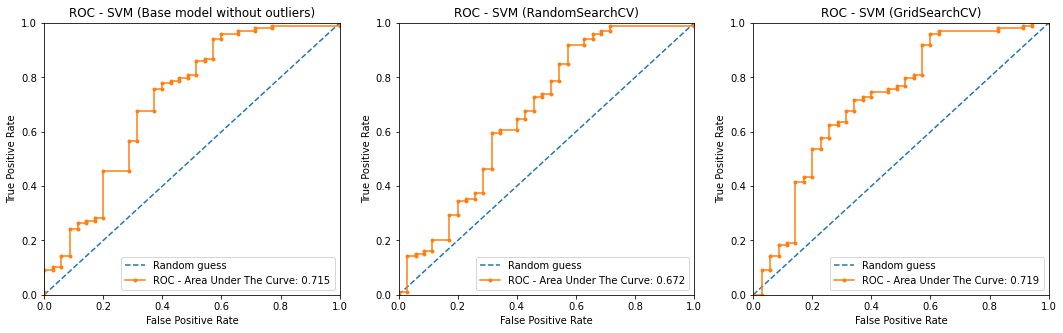

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

plot_rocs(y_test_temp_01, base_prob, ROC_area, 
          ax[0], 'ROC - SVM (Base model without outliers)')

plot_rocs(y_test_temp_01, random_search_prob, ROC_area_random_search,
          ax[1], 'ROC - SVM (RandomSearchCV)')

plot_rocs(y_test_temp_01, grid_search_prob, ROC_area_grid_search, 
          ax[2], 'ROC - SVM (GridSearchCV)')

#### Comparing with outliers
![ROC chart with outlier data](./base_ROC_SVM.png)

📝**Author's Notes:**
* It seems to me that Grid Search with the data without outliers performed the best with a 0.72 score.

## Saving Best Model

In [31]:
pickle.dump(grid,open('best_GridSearch_SVM.sav','wb'))

### Double checking if the model was saved

In [32]:
loaded_model = pickle.load(open('best_GridSearch_SVM.sav','rb'))
print('Saved')
print(confusion_matrix(y_test_temp, loaded_model.predict(X_test_temp)))
print('Original')
print(confusion_matrix(y_test_temp, grid.predict(X_test_temp)))

Saved
[[11 24]
 [ 3 96]]
Original
[[11 24]
 [ 3 96]]
